## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Mean
tumor_vol_mean = merge_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [3]:
#Median
tumor_vol_median = merge_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#Variance
tumor_vol_var = merge_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [5]:
tumor_vol_std_dev = merge_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [6]:
tumor_vol_SEM = merge_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_vol_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
#Summary statistics table for mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = pd.DataFrame({"Tumor Volume Average":tumor_vol_mean, "Tumor Volume Median":tumor_vol_median,
                            "Tumor Volume Variance":tumor_vol_var, "Tumor Volume Standard Deviation":tumor_vol_std_dev,
                            "Tumor Volume SEM":tumor_vol_SEM})
sort_tumors =tumor_volume.sort_values("Tumor Volume Average", ascending = True)
tumor_volume

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points for Each Treatment Regimen')

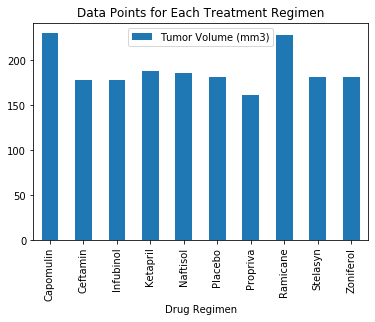

In [59]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
#Using Pandas to chart a DataFrame (Used Matplotlib, Day 2, Activity 2, avg_state_rain for reference)

#Filter the DataFrame down only to those columns to chart
columns_to_chart = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]

data_points = columns_to_chart.groupby(["Drug Regimen"]).agg ({"Tumor Volume (mm3)" : "count"})

#Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind = "bar")
                 
#Set a title for the chart
plt.title("Data Points for Each Treatment Regimen")                 


In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Used Matplotlib, Day 2, Activity 4, plotting_groups for reference (Pyplot)

#Create a group based on the values in the "Drug Regimen" column
medication = merge_df.groupby("Drug Regimen")

#Count how many times each Drug Regimen appears in the group
count_medication = medication["Drug Regimen"].count()

count_medication


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

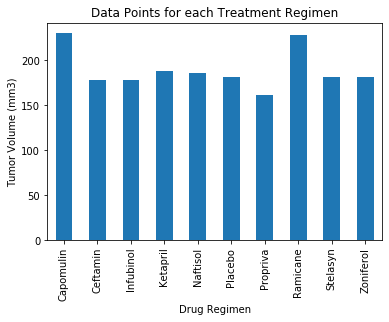

In [61]:
#Create a bar chart based off of the group series from before
count_chart = count_medication.plot(kind="bar")

#Set the xlabel and ylabel 
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Tumor Volume (mm3)")
count_chart.set_title ("Data Points for each Treatment Regimen")                       
plt.show() 
                       

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen